In [5]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task3-aqi-kim.ipynb")

# Task 3: Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

This task covers topics on the lesson on [time series](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-7-time-series.html). 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/MEDS-eds-220/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/131OnUDOLpOl94SlaMU9nGqT998ABrjFS/edit?usp=sharing&ouid=111507336322611936333&rtpof=true&sd=true) before starting.

- **Make at least 5 commits. Generally, commit every time you finish a major step.** We'll check your repository and view the commit history.

- **Add comments for all your code.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County. 

## FINAL CODE

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

In [ ]:
# FINAL CODE


## 1

a. Read the [Air Quality Index (AQI) Basics](https://www.airnow.gov/aqi/aqi-basics/) from the AirNow.gov portal.

b. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 

c. Under "Donwload Data", click on "Pre-generated Data Files".

d. Read the "About the data" section.

## 2
a. Back in the "Pre-generated Data Files" site, click on "Tables of Daily AQI".

b. Copy the URL to the 2017 Daily AQI **by County** ZIP file `daily_aqi_by_county_2017.zip`

Notice we'll be reding the data directly from its ZIP file link. This ZIP file contains a single CSV that has been compressed to save space. 

<!-- BEGIN QUESTION -->

c. In the next code cell read in the data from the URL using the [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function with the `compression='zip'` parameter added and store it as `aqi_17`. 

d. In the same cell, read in the data for the 2018 Daily AQI by County ZIP file and store it as `aqi_18`.

In [1]:
# Load the packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set pandas to display all rows, columns, and what is contained
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# b.
# Assign the url to use for downloading data
url_17 = "https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip"

# c. 
# Read in ZIPs directly using pandas
aqi_17 = pd.read_csv(url_17, compression = 'zip')

# d.
# Read in csv file from local directory
aqi_18 = pd.read_csv('data/daily_aqi_by_county_2018.csv')

<!-- END QUESTION -->

## 3
a. and b. Use the next two code cells to look at the head of both data frames. Store your results in `aqi_17_head` and `aqi_18_head`. 

In [2]:
# a.
# Use `.head()` to check first 5 rows
aqi_17_head = aqi_17.head()

In [3]:
# b.
# Use `.head()` to check first 5 rows
aqi_18_head = aqi_18.head()

In [6]:
grader.check("q3_a")

q3_a results: All test cases passed!

<!-- BEGIN QUESTION -->

c. Use this code cell to make some other preliminary data exploration of your choosing.

In [7]:
# Inspect datasets
# Using `print()` to show all data explorations
# Use `.info()` to see quick summary of dataframes

print(aqi_17.info())
print(aqi_18.info())

# Use `.describe()` to check summary statistics
print("AQI Summary statistics (2017): \n", aqi_17['AQI'].describe())
print("AQI Summary statistics (2018): \n", aqi_18['AQI'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326801 entries, 0 to 326800
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 326801 non-null  object
 1   county Name                326801 non-null  object
 2   State Code                 326801 non-null  int64 
 3   County Code                326801 non-null  int64 
 4   Date                       326801 non-null  object
 5   AQI                        326801 non-null  int64 
 6   Category                   326801 non-null  object
 7   Defining Parameter         326801 non-null  object
 8   Defining Site              326801 non-null  object
 9   Number of Sites Reporting  326801 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 24.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327541 entries, 0 to 327540
Data columns (total 10 columns):
 #   Column                     Non-Null Count   D

In [14]:
aqi_17.head(3)

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1


In [15]:
aqi_18.head(3)

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,42,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,45,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,20,Good,PM2.5,01-003-0010,1


In [18]:
aqi = pd.concat([aqi_17.tail(3),aqi_18.tail(3)],ignore_index=True)
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Wyoming,Weston,56,45,2017-12-29,31,Good,Ozone,56-045-0003,1
1,Wyoming,Weston,56,45,2017-12-30,31,Good,Ozone,56-045-0003,1
2,Wyoming,Weston,56,45,2017-12-31,26,Good,Ozone,56-045-0003,1
3,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
4,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1
5,Wyoming,Weston,56,45,2018-12-31,35,Good,Ozone,56-045-0003,1


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

d. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

_I explored the dataset by checking the names of column, data type, number of rows, if there is any null value using `.info()`. Then I used `describe()` to check the summary statistic of `'AQI'`. There is no missing values and both 2017 and 2018 have similar range of average but very different maximum._

<!-- END QUESTION -->

## 4
We currently have two separate data frames. For this exercise we will need to "glue" them one on top of the other. The `pandas` function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

NOTE: When we concatenate data frames like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the mismatch between the index of `aqi` and the number of rows i the complete data frame.


In [19]:
# Use `pd.concat()` to stack and glue two dataframes 
aqi = pd.concat([aqi_17, aqi_18], ignore_index = True)


In [25]:
aqi.head()

,state_name,county_name,state_code,county_code,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1


In [22]:
grader.check("q4")

q4 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 5

Run the following code cell and use the next markdown cell to give a line by line explanation of the code below the comment "#Simplify column names". You might need to look up the `pandas` documentation.

In [24]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



<!-- END QUESTION -->

## 6
In the next code cell:

a. Select only data from `Santa Barbara` county and store it in a new variable `aqi_sb`.

b. Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`.

Your dataframe should have the following columns in this order: `date`, `aqi`, `category`, `defining_parameter`, `defining_stie`, `number_of_sites_reporting`. 

In [ ]:
# Select only rows where the country name equals 'Santa Barbara'
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']

# Remove unnecessary columns
aqi_sb = aqi_sb.drop(columns = ['state_name', 
                                'county_name', 
                                'state_code',
                                'county_code'], axis = 1)
aqi_sb

In [32]:
grader.check("q6a")

q6a results: All test cases passed!

 
c. What is the data type of the `date` column? Write your answer in the markdown cell below. 

*The `'date'` column's data type is `object`.*

In [35]:
aqi.dtypes

state_name                   object
county_name                  object
state_code                    int64
county_code                   int64
date                         object
aqi                           int64
category                     object
defining_parameter           object
defining_site                object
number_of_sites_reporting     int64
dtype: object

<!-- BEGIN QUESTION -->

## 7
In the following cell:
1. Update the date column of `aqi_sb` to be a `pandas.datetime` object.
2. Update the index of `aqi_sb` to be the `date` column.

In [ ]:
# Convert from object type to pandas datetime
aqi_sb.date = pd.to_datetime(aqi_sb['date'])

# Setting the date as the index
aqi_sb = aqi_sb.set_index('date')
aqi_sb

<!-- END QUESTION -->

## 8
In the next cell we will calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) using the `rolling()`method for `pandas.Series`:

- `rolling()` is a lazy method, so we need to specify what we want to calculate over each window before it does something. 
- in this example we use the aggregator function `mean()` to calculate the average over each window
- the parameter '5D' indicates we want the window for our rolling average to be 5 days. 
- we get a `pandas.Series` as ouput

Store your answer in the `rolling_average` variable. You should have two columns in your series, `date` and the averages. 

In [37]:
# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb['aqi'].rolling('5D').mean()
rolling_average

date
2017-01-01     39.000000
2017-01-02     39.000000
2017-01-03     49.666667
2017-01-04     45.750000
2017-01-05     44.000000
2017-01-06     44.400000
2017-01-07     44.600000
2017-01-08     83.200000
2017-01-09     83.400000
2017-01-10     83.000000
2017-01-11     83.600000
2017-01-12     83.600000
2017-01-13     38.400000
2017-01-14     38.800000
2017-01-15     39.000000
2017-01-16     37.800000
2017-01-17     38.200000
2017-01-18     39.800000
2017-01-19     40.400000
2017-01-20     41.400000
2017-01-21     42.800000
2017-01-22     42.600000
2017-01-23     41.600000
2017-01-24     41.400000
2017-01-25     41.400000
2017-01-26     40.800000
2017-01-27     42.800000
2017-01-28     43.200000
2017-01-29     44.200000
2017-01-30     44.600000
2017-01-31     45.400000
2017-02-01     46.200000
2017-02-02     63.000000
2017-02-03     60.600000
2017-02-04     59.200000
2017-02-05     57.200000
2017-02-06     53.800000
2017-02-07     33.800000
2017-02-08     31.400000
2017-02-09     30.40

In [38]:
grader.check("q8")

q8 results: All test cases passed!

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named `five_day_average` to the `aqi_sb` dataframe. 

In [39]:
# Add new column that will store the rolling average 
aqi_sb['five_day_average'] = rolling_average

In [40]:
grader.check("q9")

q9 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Make necessary updates for the plot to be accurate, informative, and polished, even if simple. You're welcome to use plotting methods and packages beyond what we have covered in class! 

Can you see the AQI going up during the Thomas Fire in December 2017?

Text(0, 0.5, 'Air Quality Index (AQI)')

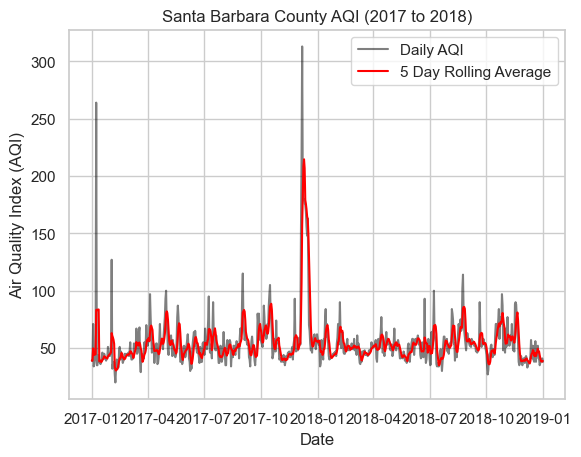

In [42]:
# Set Seaborn theme for all plots
sns.set_theme(style = "whitegrid")

# Plot daily AQI (black)
sns.lineplot(
    data = aqi_sb,
    x = aqi_sb.index,
    y = 'aqi',
    label = 'Daily AQI',
    color = 'black',
    alpha = 0.5)

# Plot 5-day rolling average on top (red)  
sns.lineplot(
    data = aqi_sb,
    x = aqi_sb.index,
    y = 'five_day_average',
    label = "5 Day Rolling Average",
    color = 'red')

# Add details and information of the line graph
plt.title('Santa Barbara County AQI (2017 to 2018)')
plt.xlabel('Date')
plt.ylabel('Air Quality Index (AQI)')

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [43]:
grader.check_all()

q3_a results: All test cases passed!

q4 results: All test cases passed!

q6a results: All test cases passed!

q8 results: All test cases passed!

q9 results: All test cases passed!

<!-- END QUESTION -->

## 11


Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).